# Linear regression on sum of all pixels

In [1]:
import numpy as np
from matplotlib import pylab as plt

In [2]:
import src.operate_datasets    as operate_datasets
import src.model_visualisation as model_visualisation
import src.model_evaluation    as model_evaluation

Welcome to JupyROOT 6.18/00


## Load data

In [3]:
full_X, full_y = operate_datasets.load_dataset('~/snd_data/new_dataset/', 'sum')

X_train, y_train, X_test, y_test = operate_datasets.split_dataset(full_X, full_y)

In [4]:
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [5]:
min_clip = 0
X_train_clp, y_train_clp = operate_datasets.clip_dataset(X_train, y_train, min_clip)

## Fit regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [7]:
model = LinearRegression().fit(X_train_clp, y_train_clp) # positive=True ???
#reg_l1 = Lasso(positive=False).fit(X_train, y_train) # positive=True ???

score_l2 = model.score(X_train.reshape(-1, 1), y_train)

print('L2: ', score_l2)

y_pred = model.predict(X_train)

L2:  0.0026813032312587026


## Visualise results

In [8]:
print('y = kx + b')
print('k', model.coef_)
print('b', model.intercept_)

y = kx + b
k [[2.96075829e-05]]
b [0.21359366]


In [9]:
model_name = 'L2 on full sum'
save_file_prefix = model_name.replace(' ', '-')

In [10]:
save_file_prefix

'L2-on-full-sum'

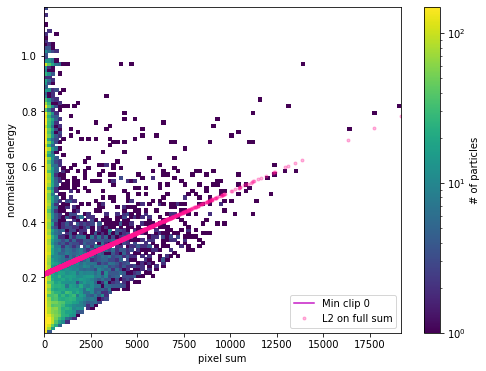

In [11]:
model_visualisation.plot_2d_energy_hist_clip(X_train, y_train, y_pred, min_clip, model_name,
                                             save_file_prefix=save_file_prefix) 

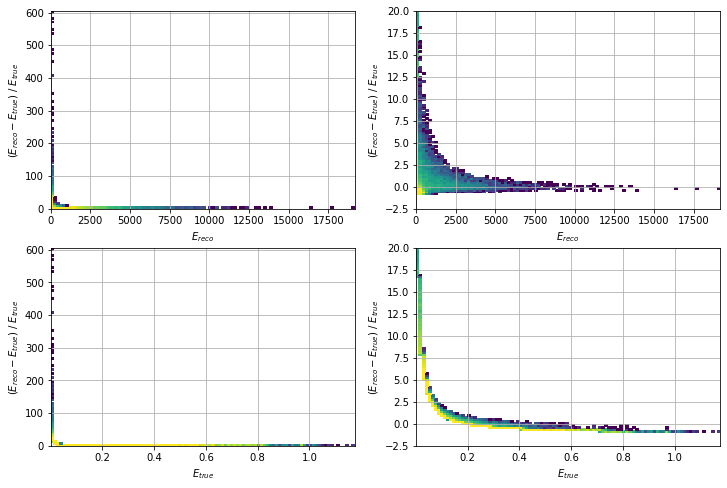

In [12]:
model_visualisation.plot_res_vs_energy(X_train, y_train, y_pred, vmax=450,
                                       save_file_prefix=save_file_prefix)  

mean   = 2.37508e+00
std    = 8.83567e+00
median = 5.19877e-01


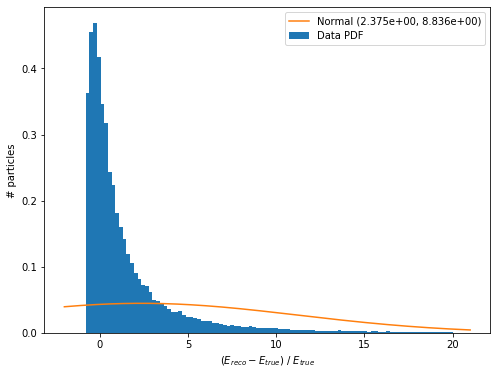

In [13]:
model_visualisation.plot_res_hist_fit(y_train, y_pred, [-1,20],
                                      save_file_prefix=save_file_prefix) 

In [14]:
model_evaluation.save_scores(y_train, y_pred, save_file_prefix)

explained_variance_score 0.013989055527852678
max_error 0.9626143136144816
mean_absolute_error 0.14065124519678718
mean_squared_error 0.03190696518173333
median_absolute_error 0.12706505244870647
r2_score 0.0026813032312587026


,L2-on-full-sum
explained_variance_score,0.013989
max_error,0.962614
mean_absolute_error,0.140651
mean_squared_error,0.031907
median_absolute_error,0.127065
r2_score,0.002681
avg_resolution,2.375080
std_resolution,8.835667


## Validation

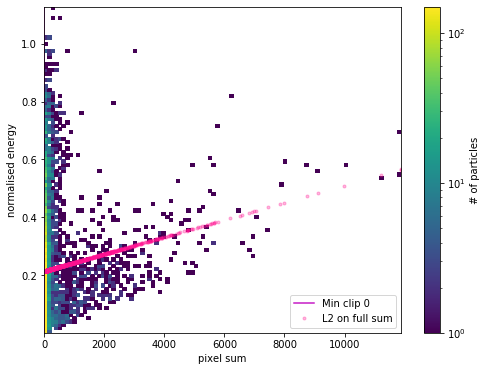

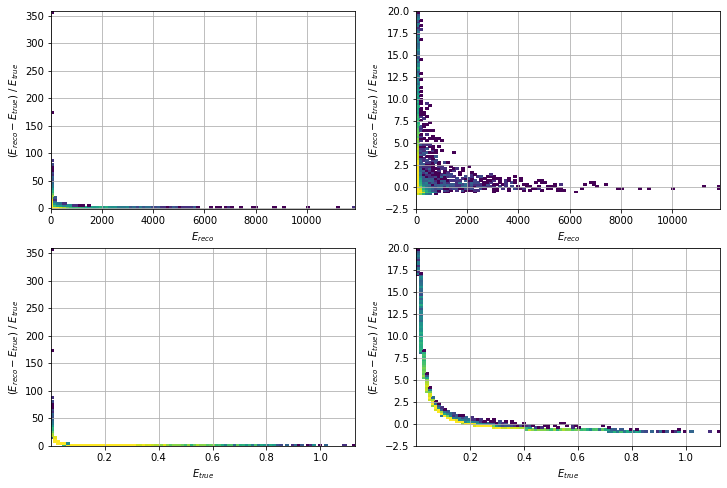

mean   = 2.24723e+00
std    = 6.65232e+00
median = 5.21801e-01


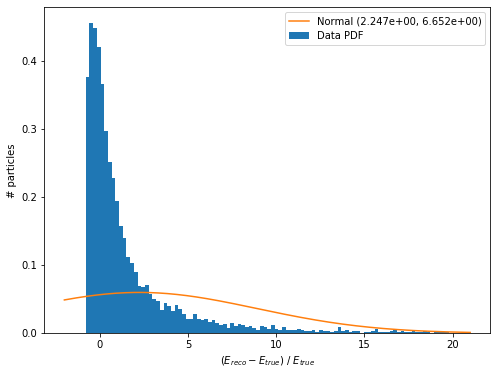

explained_variance_score 0.015206939144545295
max_error 0.9074203899939303
mean_absolute_error 0.1404981678290241
mean_squared_error 0.031751439155745714
median_absolute_error 0.12673011785328447
r2_score 0.004419112690056681


,L2-on-full-sum
explained_variance_score,0.015207
max_error,0.907420
mean_absolute_error,0.140498
mean_squared_error,0.031751
median_absolute_error,0.126730
r2_score,0.004419
avg_resolution,2.247229
std_resolution,6.652317


In [15]:
y_pred_test = model.predict(X_test)


model_visualisation.plot_2d_energy_hist_clip(X_test, y_test, y_pred_test, min_clip, model_name,
                                             save_file_prefix=save_file_prefix) 

model_visualisation.plot_res_vs_energy(X_test, y_test, y_pred_test, vmax=150,
                                       save_file_prefix=save_file_prefix)  

model_visualisation.plot_res_hist_fit(y_test, y_pred_test, [-1,20],
                                      save_file_prefix=save_file_prefix)

model_evaluation.save_scores(y_test, y_pred_test, save_file_prefix, 
                             folder_path=model_evaluation.TEST_SCORES_DIR)